## Outliers Analysis

In this section we will try to find outliers in our data. To do that, we will use DBSCAN with all features

In [5]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('../assets/final/data.csv')

In [6]:
from sklearn.cluster import DBSCAN
import numpy as np

def DB_outliers(df, eps, min_samples): # Adapted from https://donernesto.github.io/blog/outlier-detection-with-dbscan/
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(df)

    labels = np.zeros(len(db.labels_))
    
    # make a list of tuples: (i, num points in i) for i in db.labels_
    label_counts = [(i, np.sum(db.labels_==i)) for i in set(db.labels_) - set([-1])]
    label_counts.sort(key=lambda x : -x[1]) # sort by counts per class, descending
    
    # assign the labels. Those points with label =-1 get highest label (equal to number of classes -1) 
    labels[db.labels_== -1] = len(set(db.labels_)) - 1
    for i, (label, label_count) in enumerate(label_counts):
        labels[db.labels_==label] = i

    # Scale the values between 0 and 1
    labels = (labels - min(labels)) / (max(labels) - min(labels))
    print("Num Clusters:" + str(len(set(labels))))
    print("Size Outliers:" + str(np.sum(labels == 1)))

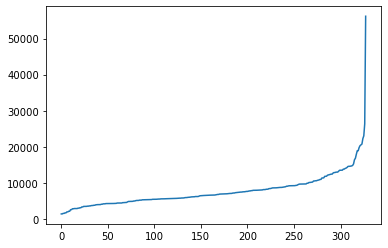

In [7]:
from sklearn.neighbors import NearestNeighbors

def k_distance_plot(df, min_samples):
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(df)
    distances, indices = nbrs.kneighbors(df)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

k_distance_plot(data, len(data.columns) * 2)

In [9]:
DB_outliers(data, 14000, len(data.columns) * 2)

Num Clusters:3
Size Outliers:270


In [11]:
100 * 90 / len(data)

27.4390243902439